Optimal bandit index: 2
True optimal bandit index: 2
Mean estimates for each bandit: [0.6666666666666666, 0.6, 0.7514011208967172]
Total reward earned: 7506.0
Overall win rate: 0.7506
Number of times selected true optimal bandit: 9992
Number of times selected each bandit: [6, 5, 9992]


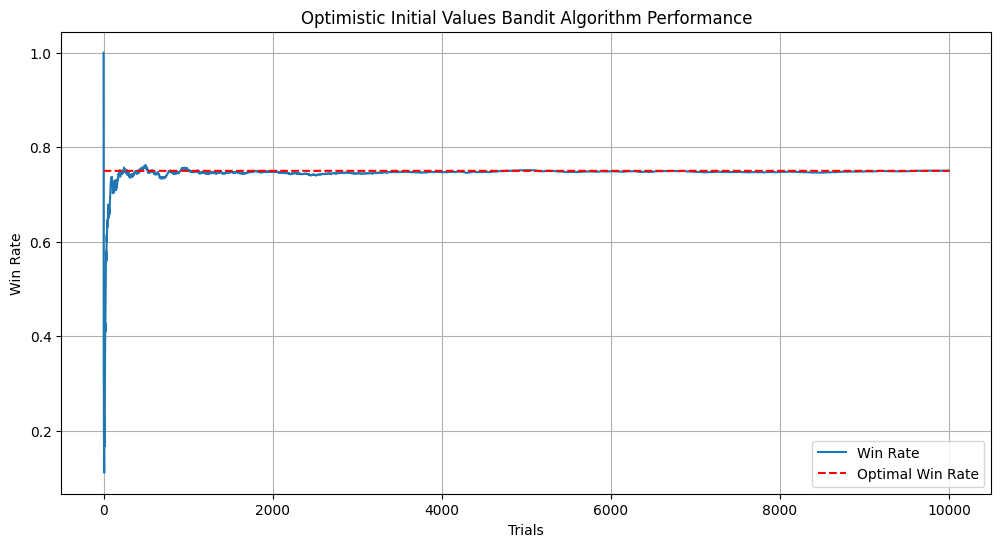

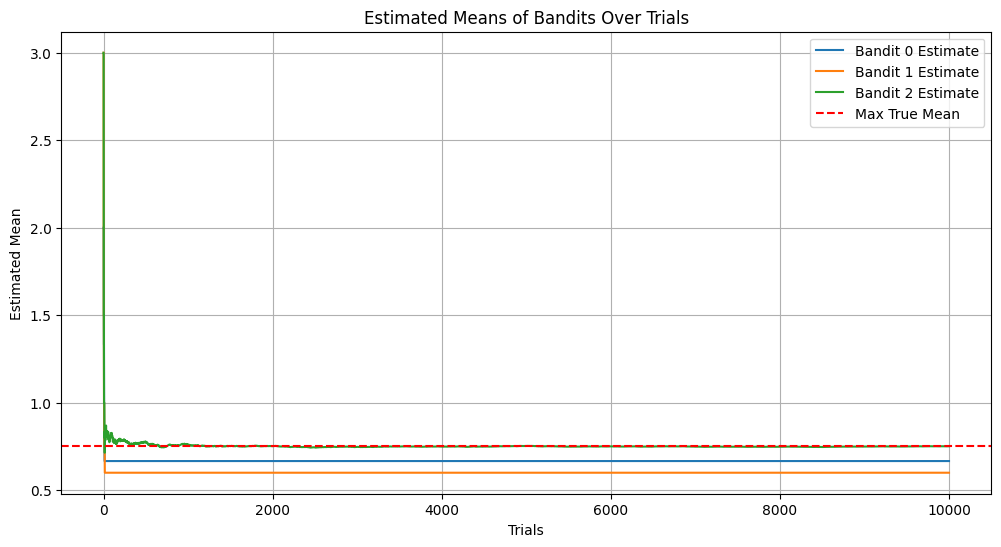

In [8]:
import matplotlib.pyplot as plt
import numpy as np

class Bandit:
    def __init__(self, p, initial_value=5.0):
        """
        Initialize a bandit with a given win probability 'p' and an initial estimate.
        Attributes:
        - p: The true probability of winning (unknown to the agent).
        - p_estimate: The agent's current estimate of this probability (initially optimistic).
        - N: Number of trials (initially 1).
        Parameters:
        - p: The true win probability.
        - initial_value: The initial estimate for p_estimate (default is 5.0).
        """
        self.p = p  # The true win probability
        self.p_estimate = initial_value  # Optimistic initial estimate to encourage exploration
        self.N = 1  # Start at 1 so that the initial value is included in the estimated mean

    def pull(self):
        """
        Simulates pulling the bandit's arm.
        Returns:
        - 1 (win) with probability 'p', and 0 (loss) otherwise.
        """
        return np.random.random() < self.p  # Returns True if a random number < p (win)

    def update(self, x):
        """
        Updates the agent's estimate of the bandit's win rate.
        Parameters:
        - x: The reward received from pulling the arm (1 for win, 0 for loss).
        """
        self.N += 1.0  # Increment the number of samples collected
        # Update the estimated probability using the formula for incremental mean
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N


def optimistic_initial_values(bandit_probabilities, num_trials, initial_value=5.0):
    """
    Runs the bandit algorithm using optimistic initial values.
    Parameters:
    - bandit_probabilities: List of true probabilities for each bandit.
    - num_trials: The number of trials to simulate.
    - initial_value: The initial value for the optimistic estimate (default is 5.0).
    """
    rewards = np.zeros(num_trials)  # Array to store rewards for each trial
    estimated_means = np.zeros((len(bandit_probabilities), num_trials))  # Array to store estimated means
    bandits = [Bandit(p, initial_value=initial_value) for p in bandit_probabilities]  # Initialize bandits
    optimal_j = np.argmax(bandit_probabilities)  # The index of the optimal (highest true probability) bandit
    num_optimal = 1  # Track how often the best true bandit is chosen (Set to 1 because of one step of initialization)

    for i in range(num_trials):
        # Select the bandit with the highest estimated probability
        j = np.argmax([b.p_estimate for b in bandits])
        x = bandits[j].pull()  # Pull the arm for the selected bandit
        rewards[i] = x  # Store the reward for this trial (1 for win, 0 for loss)

        # Update the selected bandit
        bandits[j].update(x)

        if j == optimal_j:
          num_optimal += 1  # Increment if we chose the true optimal bandit

        # Store the estimated means for each bandit at this trial
        for k in range(len(bandits)):
            estimated_means[k, i] = bandits[k].p_estimate

    # Calculate cumulative rewards and win rates after all trials
    cumulative_rewards = np.cumsum(rewards)  # Cumulative sum of rewards at each trial
    win_rates = cumulative_rewards / (np.arange(num_trials) + 1)  # Calculate win rate at each point in time

    # Compute statistics for the experiment
    mean_estimates = [b.p_estimate for b in bandits]  # The final estimated probabilities for each bandit
    total_reward = rewards.sum()  # The total reward earned over all trials
    overall_win_rate = total_reward / num_trials  # The overall win rate (reward per trial)

    # Print out experiment results
    print("Optimal bandit index:", np.argmax(mean_estimates))
    print("True optimal bandit index:", optimal_j)
    print("Mean estimates for each bandit:", mean_estimates)
    print("Total reward earned:", total_reward)
    print("Overall win rate:", overall_win_rate)
    print("Number of times selected true optimal bandit:", num_optimal)
    print("Number of times selected each bandit:", [int(b.N) for b in bandits])
    # Plot the results for visualization
    plot_win_rate(win_rates, bandit_probabilities, num_trials)
    plot_estimated_means(estimated_means, bandit_probabilities, num_trials)


def plot_win_rate(win_rates, bandit_probabilities, num_trials):
    """
    Plots the win rates over time and the optimal win rate for comparison.
    Parameters:
    - win_rates: The win rates obtained during the experiment for each bandit.
    - bandit_probabilities: The true win probabilities of the bandits.
    - num_trials: The total number of trials (or pulls).
    """
    plt.figure(figsize=(12, 6))
    plt.plot(win_rates, label='Win Rate')

    plt.plot(np.ones(num_trials) * np.max(bandit_probabilities),
             linestyle='--', color='red', label='Optimal Win Rate')  # Plot the best possible win rate
    plt.xlabel('Trials')
    plt.ylabel('Win Rate')
    plt.title('Optimistic Initial Values Bandit Algorithm Performance')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


def plot_estimated_means(estimated_means, bandit_probabilities, num_trials):
    """
    Plots the estimated means of the bandits over time.
    Parameters:
    - estimated_means: The estimated means for each bandit over the trials.
    - bandit_probabilities: The true win probabilities of the bandits.
    - num_trials: The total number of trials (or pulls).
    """
    plt.figure(figsize=(12, 6))
    for i in range(len(bandit_probabilities)):
        plt.plot(estimated_means[i], label=f'Bandit {i} Estimate')  # Plot estimated mean for each bandit

    plt.axhline(y=np.max(bandit_probabilities), color='red', linestyle='--', label='Max True Mean')  # Horizontal line for max true mean
    plt.xlabel('Trials')
    plt.ylabel('Estimated Mean')
    plt.title('Estimated Means of Bandits Over Trials')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()


if __name__ == "__main__":
    BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]  # The true probabilities of each bandit
    NUM_TRIALS = 10000  # Number of trials to simulate
    INITIAL_VALUE = 3.0  # Initial value for p_estimate
    optimistic_initial_values(BANDIT_PROBABILITIES, NUM_TRIALS, INITIAL_VALUE)

The results show minimal difference between the final cumulative reward and the true optimal win rate, indicating an improvement over the previous epsilon-greedy approach.

However, the mean estimates for suboptimal bandits remain inaccurate, as they are not updated once they fall below the optimal bandit’s win rate due to the greedy selection mechanism.